# 機械学習講習会 
#pythonにおける基本的な文法
## @ 虎ノ門

#### 中西均

#### 2015/ 5/ 23 (Sat)

# はじめに

## この回では、pythonの基本的な文法を紹介します。
##### pythonによる機械学習の実装に向けたデータ加工、データビジュアライゼーションを中心に扱います。

# 目次
## Pythonを使ったデータ解析
## パッケージ、モジュールの読み込み
## 基本的な文法: 型、条件文、関数
## Dataの加工処理とVisualization: Numpy,  PandasとMatplotlib
## Fileの読み書き

# Pythonを使ったデータ解析

Pythonを使ってデータ解析を行うことを考えます。

一般に次の順番で解析が進行します。

- データの取得(API, webからの取得, csv file, SQL)
- データの加工その1( <font color='red'>numpy</font> や <font color='red'>pandas</font> などを使った行列計算)
- 機械学習、データ分析(今回は <font color='red'>scikit learn</font> を用います)
- データの加工その2( <font color='red'>numpy</font> や <font color='red'>pandas</font> などを使って整形)
- データの可視化( <font color='red'>matplotlib</font> を使って表現)
- データの保存


## それではcodeを書いていきましょう。

# パッケージ、モジュールの読み込み

pythonでのパッケージ、モジュールの読み込み方法は、

import A

import A.B

import A as B

from B import A

のようにして行うことができる。
これらの表記の違いはモジュールインポート後のアクセス方法の違いに関わってくる。

In [1]:
%matplotlib inline
import math
import numpy as np
from numpy.random import *
import pandas as pd
import matplotlib.pyplot as plt  # pylabの代わりにmatplotlibのpyplotを使う。
import random as rd

 # pythonの基本
 ## リスト、タプル、辞書、集合
 pythonでの組み込みクラスについて見てみましょう。

##リスト
要素としてあらゆるオブジェクトを入れて、まとめて管理できる型。

要素を指定して、取り出すほか、
要素を追加削除したり、他のリストと連結、変換を行ったりすることができる。

In [2]:
years_list = [2010, 2011, 2012, 2013, 2014, 2015]
print years_list[0]
partial_years_list1 = years_list[1:]  # 1,2,3,4,5を取り出す
partial_years_list2 = years_list[3:5] # 3,4を取り出す
print partial_years_list1
print partial_years_list2
years_list.pop(0)
years_list.append(2016)
print years_list

2010
[2011, 2012, 2013, 2014, 2015]
[2013, 2014]
[2011, 2012, 2013, 2014, 2015, 2016]


# タプル
リストと同じく要素としてオブジェクトをいれて、管理できる型。

リストと同じく要素を取り出したり、連結をしたりすることができる。

違いは一度作成したオブジェクトの変更ができず、メソッドが用意されていない。

In [3]:
days_tuple = ("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")
print days_tuple[0]
partial_days_tuple = days_tuple[:3]
print partial_days_tuple

Sun
('Sun', 'Mon', 'Tue')


# 辞書
辞書型はkeyとvalueと呼ばれる2つのオブジェクトから要素が構成される。

keyを指定することでvalueを取り出すことができる。

keyには変更できない型が指定できる。(数値、文字列、tupleなど)

要素の追加、削除や、key, valueの一覧を取り出すことができる。

In [4]:
countries_dict = {"JP":u"日本", "CA":u"カナダ", "UK": u"イギリス"}
print countries_dict["JP"]
countries_dict.update({"US": u"アメリカ"})
print countries_dict.keys()

日本
['CA', 'JP', 'US', 'UK']


# 集合
集合型は重複、順序なしで要素を管理する型。
和集合や、差集合をとったり、ある要素が集合に含まれているかを調べたりすることができる。

In [5]:
Fruits_set = set(["apple", "orange", "banana", "lemon", "grape"])
Fruits_set.add("strauberry")
print Fruits_set

set(['grape', 'apple', 'strauberry', 'orange', 'lemon', 'banana'])


# 組み込み関数
### python自体が持っている関数のことを、組み込み関数という。

range, tuple, zip, dict, format, sum, len, max, min, map, filter, reduceなど多く用意されている。

In [6]:
# リストの作成
list1 = range(10)
list2 = range(6,16)
print list1, list2 
print "The type of list1is %s \n " % type(list1)

# タプルの作成
tuple1 = tuple(list1)
print tuple1,"\n"

two_multi_list1 = zip(list1, list2)
print two_multi_list1,"\n"

# 辞書の作成
dictionary1 = dict(two_multi_list1)
print dictionary1,"\n"
print "Output of dictionary1[0] is %s \n" % dictionary1[0]

# 集合の作成
set1 = set(list1)
print set1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
The type of list1is <type 'list'> 
 
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9) 

[(0, 6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11), (6, 12), (7, 13), (8, 14), (9, 15)] 

{0: 6, 1: 7, 2: 8, 3: 9, 4: 10, 5: 11, 6: 12, 7: 13, 8: 14, 9: 15} 

Output of dictionary1[0] is 6 

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [7]:
sum_list1 = sum(list1)
len_list1 = len(list1)
max_list2 = max(list2)
min_list2 = min(list2)
print "sum of list1 is {0}, length of list1 is {1}".format(sum_list1, len_list1)
print "max of list2 is {0}, min of list2 is {1}".format(max_list2, min_list2)

sum of list1 is 45, length of list1 is 10
max of list2 is 15, min of list2 is 6


In [8]:
double_list1 = map(lambda x: 2*x, list1)
print "converted list1:{0} to double list1:{1}".format(list1, double_list1)

converted list1:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] to double list1:[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [9]:
filter_more3_list1 = filter(lambda x: x>3, list1)
print filter_more3_list1

[4, 5, 6, 7, 8, 9]


In [10]:
sum_list2 = reduce(lambda x,y:x + y, list2)
print sum_list2

105


# 関数の定義

関数を定義することで、繰り返しの処理を簡単に行うことができる。

pythonでは、インデント(最初の空白)で関数内に入っているかを判定する。

In [11]:
Fruits_set = set(["apple", "orange", "banana", "lemon", "grape"])

def find_fruit(item):
    if item in Fruits_set:
        print "{0} = fruit".format(item)
    else:
        print "{0} != fruit".format(item)

find_fruit("father")
find_fruit("apple")

father != fruit
apple = fruit


# Numpy
数値計算用ライブラリ。
内部でCによるインプリメントが施されているため、高速で計算処理を行うことができる。

Numpy.ndarrayというndarray型を使う。

numpy.randomを使って乱数を作成してみる。

(from numpy.random import *でインポートした。)

In [12]:
Random_datum = rand(20)
print Random_datum
print type(Random_datum)

[ 0.967725    0.26244062  0.35067383  0.01638462  0.48887631  0.59263942
  0.59710728  0.7007428   0.75566341  0.74705351  0.04912948  0.49477757
  0.94801954  0.54883747  0.86116841  0.06731333  0.68969147  0.12195056
  0.1128017   0.4953406 ]
<type 'numpy.ndarray'>


### 2000年から2016年までのランダムな年が入った20個の配列を作る。 

In [13]:
randint(2000, 2016, 20)

array([2010, 2013, 2001, 2003, 2008, 2014, 2012, 2000, 2002, 2009, 2007,
       2007, 2005, 2015, 2012, 2008, 2002, 2005, 2007, 2012])

### 整数0~9が入った7×7の行列を作る。

In [14]:
matrix77 = randint(0,10,(7,7))
print matrix77
print type(matrix77)

[[4 2 7 4 2 4 0]
 [2 7 0 2 7 5 1]
 [8 3 5 4 5 4 2]
 [7 5 6 2 4 6 3]
 [9 5 6 8 9 9 7]
 [1 2 8 0 7 4 7]
 [1 6 6 2 3 7 5]]
<type 'numpy.ndarray'>


# Numpyを使ったデータ加工の例

## ものの測定データ
得られた1000個のデータが正規分布に従っていると仮定して、計算をしてみましょう。

In [32]:
# 平均30,分散10の正規分布に従って、randomな数を1000個作成。
normal_datum = normal(30,10, 1000)

そこで平均の推定量は次のように計算される。

$$ \bar{x} = \hat{\mu} = \frac{1}{n} \sum x_i $$

同様に標準偏差の推定量は次のように計算される。

$$ \hat{\sigma} = \frac{\sum (x_i - \bar{x})^2}{n -1} $$

推定量の標準偏差について、
$$ \sigma(\bar{x}) = \frac{\sigma}{\sqrt{n}} $$
が言えて、
$$ \sigma(\bar{x}) = \frac{\hat{\sigma}}{\sqrt{n}} $$
と計算して求めることができる。

In [16]:
mean = round(np.mean(normal_datum,dtype=np.float32),3)
std = round(np.std(normal_datum, ddof=1,dtype=np.float32), 5)
mean_std = round(std/math.sqrt(15), 5)
print "Mean={0}, STD={1},Mean_STD={2}".format(mean, std, mean_std)
print "よって平均値の推定は、{0}±{2}, 分散の推定値は{1} \n真の値である平均値30,分散10とconsistent".format(mean, std, mean_std)

Mean=30.412, STD=9.72702,Mean_STD=2.51151
よって平均値の推定は、30.412±2.51151, 分散の推定値は9.72702 
真の値である平均値30,分散10とconsistent


(array([  1.,   0.,   0.,   2.,   0.,   1.,   1.,   0.,   7.,   5.,   7.,
         12.,   9.,   8.,  19.,  19.,  22.,  28.,  30.,  39.,  31.,  39.,
         41.,  58.,  52.,  48.,  60.,  51.,  57.,  55.,  32.,  25.,  34.,
         27.,  28.,  39.,  22.,  23.,  18.,  13.,  13.,   6.,   7.,   6.,
          2.,   1.,   0.,   0.,   0.,   2.]),
 array([ -2.83707524,  -1.57569232,  -0.31430941,   0.94707351,
          2.20845643,   3.46983935,   4.73122226,   5.99260518,
          7.2539881 ,   8.51537101,   9.77675393,  11.03813685,
         12.29951977,  13.56090268,  14.8222856 ,  16.08366852,
         17.34505144,  18.60643435,  19.86781727,  21.12920019,
         22.3905831 ,  23.65196602,  24.91334894,  26.17473186,
         27.43611477,  28.69749769,  29.95888061,  31.22026352,
         32.48164644,  33.74302936,  35.00441228,  36.26579519,
         37.52717811,  38.78856103,  40.04994395,  41.31132686,
         42.57270978,  43.8340927 ,  45.09547561,  46.35685853,
         47.618241

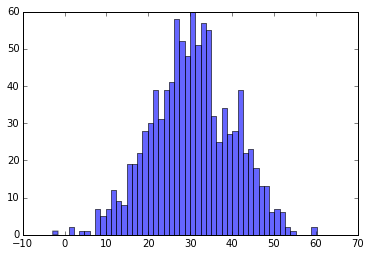

In [17]:
plt.hist(normal_datum, bins=50, alpha=0.6)
#plt.show()

# Pandasを使ったData加工
DataFrameと呼ばれる表型の多次元配列と、Seriesと呼ばれる配列が主に使われる。

2015-05-24    0.522731
2015-05-25    0.847579
2015-05-26   -0.469493
2015-05-27    1.381011
2015-05-28   -0.501458
2015-05-29   -0.226971
2015-05-30   -0.560933
2015-05-31   -0.296603
2015-06-01   -1.234280
2015-06-02    1.055512
2015-06-03    0.864804
2015-06-04   -0.497853
2015-06-05    1.889989
2015-06-06    0.217788
2015-06-07   -0.355511
...
2016-06-12    0.840843
2016-06-13   -0.702017
2016-06-14   -0.838687
2016-06-15    0.233875
2016-06-16    1.082067
2016-06-17    0.202799
2016-06-18    1.638992
2016-06-19    0.864708
2016-06-20   -0.104530
2016-06-21    0.439782
2016-06-22   -0.561861
2016-06-23   -0.685354
2016-06-24    1.109323
2016-06-25    0.290980
2016-06-26    0.617162
Freq: D, Length: 400


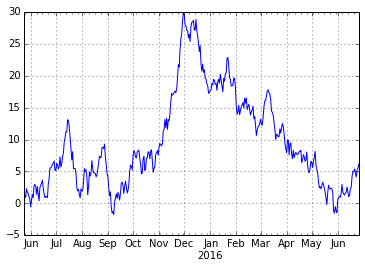

In [18]:
time_series = pd.Series(randn(400), index=pd.date_range('5/24/2015', periods=400))
print time_series
time_series_cum = time_series.cumsum()
time_series_cum.plot()

          a         b         c         d         e
0  0.070168  0.265858  0.850016  0.281641  0.951560
1  0.573395  0.471975  0.047161  0.593852  0.142821
2  0.955663  0.304477  0.599369  0.436050  0.657034
3  0.522671  0.827938  0.450220  0.386473  0.523042
4  0.684429  0.781530  0.475080  0.479966  0.334825
5  0.421336  0.265455  0.734438  0.008091  0.258433
6  0.129350  0.863594  0.544230  0.703546  0.926271
7  0.759455  0.630417  0.495824  0.260369  0.411397


AttributeError: 'DataFrame' object has no attribute 'title'

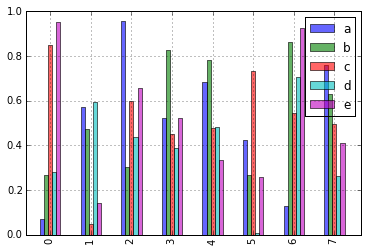

In [33]:
df1 = pd.DataFrame(rand(8, 5), columns=['a', 'b', 'c', 'd', 'e'])
print df1
df1.plot(kind='bar', alpha=0.6)
df1.title("test bar data")

# dataの読み書き
### pandasから読み書きする方法が分かりやすい。
csv fileとtsv fileで使うと互換性がよい。

### データを書き込み

In [26]:
df1.to_csv('bar_data.csv', index=0)
df2.to_csv( 'bar_data.tsv', sep='\t', index=0)

### データの読み込み

In [27]:
df2 = pd.read_csv('bar_data.csv')
df2

,a,b,c,d,e
0,0.623378,0.129408,0.018125,0.955533,0.484414
1,0.657098,0.340044,0.389893,0.074795,0.207430
2,0.548314,0.794055,0.041263,0.944952,0.205769
3,0.365320,0.961009,0.512197,0.805796,0.002087
4,0.234000,0.835268,0.666507,0.420280,0.086737
5,0.330629,0.993646,0.955271,0.947760,0.811460
6,0.860152,0.093252,0.249279,0.177542,0.357705
7,0.200926,0.718892,0.003464,0.501064,0.983629


これでこの回は終わります。
それでは後半機械学習を実践してみましょう。